<a href="https://colab.research.google.com/github/shubhamvj2801/shubhamvj2801/blob/main/Data_Modelling_%26_Analysis_of_Covid_19_virus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing Important Libraries for Data Modelling & Analysis.**

In [1]:
!pip install git+git://github.com/geopandas/geopandas.git
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import cv2
from matplotlib import pyplot as plt
import geopandas as gpd


  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-dpn8p34e
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-dpn8p34e
     |████████████████████████████████| 15.3MB 282kB/s 
     |████████████████████████████████| 6.6MB 29.6MB/s 
  Created wheel for geopandas: filename=geopandas-0.9.0+33.gc6aedba-py2.py3-none-any.whl size=996295 sha256=b006815076b7a7d4c7dc751e7349aff6d55ad62c94826cf250d8b13b34775dfb
  Stored in directory: /tmp/pip-ephem-wheel-cache-t2gjfdnl/wheels/91/24/71/376c9c67192694168352afcccc2d264248f7e2cc6192997186
Successfully built geopandas


## **Importing the data from URL for Analysis**

In [2]:
confirmed_case_file_link="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
death_case_file_link="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
recovered_case_file_link="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
country_case_file_link="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv"

##**Converting the datasets into respective dataframe**
    (we are using shape to get the no of rows and columns)

In [3]:
c_d=pd.read_csv(confirmed_case_file_link)
print(c_d.shape)
d_d=pd.read_csv(death_case_file_link)
print(d_d.shape)
r_d=pd.read_csv(recovered_case_file_link)
print(r_d.shape)
count_d=pd.read_csv(country_case_file_link)
print(count_d.shape)

(276, 498)
(276, 498)
(261, 498)
(193, 14)


In [4]:
c_d.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '5/20/21', '5/21/21', '5/22/21', '5/23/21', '5/24/21', '5/25/21',
       '5/26/21', '5/27/21', '5/28/21', '5/29/21'],
      dtype='object', length=498)

In [5]:
d_d.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '5/20/21', '5/21/21', '5/22/21', '5/23/21', '5/24/21', '5/25/21',
       '5/26/21', '5/27/21', '5/28/21', '5/29/21'],
      dtype='object', length=498)

In [6]:
r_d.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '5/20/21', '5/21/21', '5/22/21', '5/23/21', '5/24/21', '5/25/21',
       '5/26/21', '5/27/21', '5/28/21', '5/29/21'],
      dtype='object', length=498)

In [7]:
c_d.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,58037,58214,58312,58542,58730,58843,59015,59225,59370,59576,59745,59939,60122,60300,60563,60797,61162,61455,61755,61842,62063,62403,62718,63045,63355,63412,63484,63598,63819,64122,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,129842,129980,130114,130270,130409,130537,130606,130736,130859,130977,131085,131185,131238,131276,131327,131419,131510,131577,131666,131723,131753,131803,131845,131890,131939,131978,132015,132032,132071,132095,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,119992,120174,120363,120562,120736,120922,121112,121344,121580,121866,122108,122311,122522,122717,122999,123272,123473,123692,123900,124104,124288,124483,124682,124889,125059,125194,125311,125485,125693,125896,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,12874,12917,12942,13007,13024,13060,13083,13121,13148,13198,13232,13232,13282,13295,13316,13340,13363,13390,13406,13423,13429,13447,13470,13470,13510,13510,13510,13555,13569,13569,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,24661,24883,25051,25279,25492,25609,25710,25942,26168,26431,26652,26815,26993,27133,27284,27529,27921,28201,28477,28740,28875,29146,29405,29695,30030,30354,30637,30787,31045,31438,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180


In [8]:
count_d.nlargest(3,['Confirmed'])

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
179,US,2021-05-30 09:20:52,40.000000,-100.00000,33251982.0,594306.0,NaN,NaN,10092.681320,NaN,NaN,1.787280,840,USA
79,India,2021-05-30 09:20:52,20.593684,78.96288,27894800.0,325972.0,25454320.0,2114508.0,2021.355896,NaN,NaN,1.168576,356,IND
23,Brazil,2021-05-30 09:20:52,-14.235000,-51.92530,16471600.0,461057.0,14496224.0,1514319.0,7749.174726,NaN,NaN,2.799103,76,BRA


In [9]:
count_d.tail()

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
188,Vietnam,2021-05-30 09:20:52,14.058324,108.277199,6908.0,47.0,2950.0,3911.0,7.096878,NaN,NaN,0.680371,704,VNM
189,West Bank and Gaza,2021-05-30 09:20:52,31.952200,35.233200,307838.0,3492.0,300524.0,3822.0,6034.363792,NaN,NaN,1.134363,275,PSE
190,Yemen,2021-05-30 09:20:52,15.552727,48.516388,6731.0,1319.0,3399.0,2013.0,22.567583,NaN,NaN,19.595900,887,YEM
191,Zambia,2021-05-30 09:20:52,-13.133897,27.849332,94751.0,1276.0,91594.0,1881.0,515.400494,NaN,NaN,1.346688,894,ZMB
192,Zimbabwe,2021-05-30 09:20:52,-19.015438,29.154857,38933.0,1594.0,36578.0,761.0,261.947058,NaN,NaN,4.094213,716,ZWE


## Lets check how many countries data are present

In [10]:
c_d["Country/Region"].nunique()

193

##**Collecting the confirmed cases data of INDIA **

In [11]:
IND_d=c_d[c_d["Country/Region"]=="India"]

In [12]:
IND_d

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
147,NaN,India,20.593684,78.96288,0,0,0,0,0,0,0,0,1,1,1,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,...,15616130,15930774,16263695,16610481,16960172,17313163,17636186,17997113,18376421,18762976,19164969,19557457,19925517,20282833,20664979,21077410,21491598,21892676,22296081,22662575,22992517,23340938,23703665,24046809,24372907,24684077,24965463,25228996,25496330,25772440,26031991,26289290,26530132,26752447,26948874,27157795,27369093,27555457,27729247,27894800


## Imputing the data (To remove the 0's and null value)

In [13]:
c_d=c_d.replace(np.nan,'',regex=True)
d_d=d_d.replace(np.nan,'',regex=True)
r_d=r_d.replace(np.nan,'',regex=True)
count_d=count_d.replace(np.nan,'',regex=True)

In [14]:
c_d

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,,Afghanistan,33.9391,67.71,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,58037,58214,58312,58542,58730,58843,59015,59225,59370,59576,59745,59939,60122,60300,60563,60797,61162,61455,61755,61842,62063,62403,62718,63045,63355,63412,63484,63598,63819,64122,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111
1,,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,129842,129980,130114,130270,130409,130537,130606,130736,130859,130977,131085,131185,131238,131276,131327,131419,131510,131577,131666,131723,131753,131803,131845,131890,131939,131978,132015,132032,132071,132095,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297
2,,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,119992,120174,120363,120562,120736,120922,121112,121344,121580,121866,122108,122311,122522,122717,122999,123272,123473,123692,123900,124104,124288,124483,124682,124889,125059,125194,125311,125485,125693,125896,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456
3,,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,12874,12917,12942,13007,13024,13060,13083,13121,13148,13198,13232,13232,13282,13295,13316,13340,13363,13390,13406,13423,13429,13447,13470,13470,13510,13510,13510,13555,13569,13569,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693
4,,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,24661,24883,25051,25279,25492,25609,25710,25942,26168,26431,26652,26815,26993,27133,27284,27529,27921,28201,28477,28740,28875,29146,29405,29695,30030,30354,30637,30787,31045,31438,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,,Vietnam,14.0583,108.277,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,2800,2812,2824,2830,2833,2843,2852,2857,2865,2910,2928,2942,2962,2985,2995,3030,3090,3137,3245,3412,3489,3571,3658,3740,3816,4112,4212,4359,4512,4720,4809,4941,5119,5275,5404,5931,6086,6356,6396,6908
272,,West Bank and Gaza,31.9522,35.2332,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,284280,286028,287680,289120,290259,290972,292052,293466,294550,295601,296462,296462,297638,298203,298921,299736,300387,300946,301437,301751,302249,302777,303270,303270,303270,303658,303827,304074,304074,304532,304532,304968,305201,305201,305777,306334,306795,306795,307569,307838
273,,Yemen,15.5527,48.5164,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5918,5960,6020,6056,6105,6137,6183,6220,6263,6294,6317,6325,6341,6363,6390,6414,6426,6446,6462,6482,6485,6492,6498,6507,6523,6538,6543,6568,6586,6593,6613,6632,6649,6658,6662,6670,6688,6696,6723,6731
274,,Zambia,-13.1339,27.8493,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,91042,91119,91189,91251,91317,91358,91378,91418,91484,91533,91586,91670,91693,91722,91804,91849,91946,92004,92057

## Exploratory Data Analysis

Global Summary - Case Count 

In [15]:
global_info=count_d.copy().drop(columns=['Lat','Long_','Country_Region','Last_Update','UID','ISO3','Mortality_Rate'],axis=1)
global_info.dropna()

,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized
0,70111.0,2899.0,57281,9931,180.103,,
1,132297.0,2449.0,129215,633,4597.16,,
2,128456.0,3460.0,89419,35577,292.937,,
3,13693.0,127.0,13416,150,17722.1,,
4,34180.0,757.0,27646,5777,103.997,,
...,...,...,...,...,...,...,...
188,6908.0,47.0,2950,3911,7.09688,,
189,307838.0,3492.0,300524,3822,6034.36,,
190,6731.0,1319.0,3399,2013,22.5676,,
191,94751.0,1276.0,91594,1881,515.4,,


In [16]:
global_detail=count_d.copy().drop(columns=['Lat','Long_','Last_Update'],axis=1)
global_detail

,Country_Region,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
0,Afghanistan,70111.0,2899.0,57281,9931,180.103,,,4.134872,4,AFG
1,Albania,132297.0,2449.0,129215,633,4597.16,,,1.851138,8,ALB
2,Algeria,128456.0,3460.0,89419,35577,292.937,,,2.693529,12,DZA
3,Andorra,13693.0,127.0,13416,150,17722.1,,,0.927481,20,AND
4,Angola,34180.0,757.0,27646,5777,103.997,,,2.214745,24,AGO
...,...,...,...,...,...,...,...,...,...,...,...
188,Vietnam,6908.0,47.0,2950,3911,7.09688,,,0.680371,704,VNM
189,West Bank and Gaza,307838.0,3492.0,300524,3822,6034.36,,,1.134363,275,PSE
190,Yemen,6731.0,1319.0,3399,2013,22.5676,,,19.595900,887,YEM
191,Zambia,94751.0,1276.0,91594,1881,515.4,,,1.346688,894,ZMB


In [17]:
global_info

,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized
0,70111.0,2899.0,57281,9931,180.103,,
1,132297.0,2449.0,129215,633,4597.16,,
2,128456.0,3460.0,89419,35577,292.937,,
3,13693.0,127.0,13416,150,17722.1,,
4,34180.0,757.0,27646,5777,103.997,,
...,...,...,...,...,...,...,...
188,6908.0,47.0,2950,3911,7.09688,,
189,307838.0,3492.0,300524,3822,6034.36,,
190,6731.0,1319.0,3399,2013,22.5676,,
191,94751.0,1276.0,91594,1881,515.4,,


In [18]:
total_cases_global=pd.DataFrame(global_info.copy().sum()).transpose()
pd.options.display.float_format = '{:,.4f}'.format
print(total_cases_global)

         Confirmed         Deaths People_Tested People_Hospitalized
0 169,986,948.0000 3,534,435.0000                                  


In [19]:
total_cases_global

,Confirmed,Deaths,People_Tested,People_Hospitalized
0,"169,986,948.0000","3,534,435.0000",,


## Chart 1 - Confirmed Cases Globally

In [20]:
confirmed_ts=c_d.copy().drop(columns=['Lat','Long','Province/State'])
confirmed_ts_summary=confirmed_ts.sum()
recovered_ts=r_d.copy().drop(columns=['Lat','Long','Province/State'])
recovered_ts_summary=recovered_ts.sum()
death_ts=d_d.copy().drop(columns=['Lat','Long','Province/State'])
death_ts_summary=death_ts.sum()

In [21]:
confirmed_ts

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,58037,58214,58312,58542,58730,58843,59015,59225,59370,59576,59745,59939,60122,60300,60563,60797,61162,61455,61755,61842,62063,62403,62718,63045,63355,63412,63484,63598,63819,64122,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111
1,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,129842,129980,130114,130270,130409,130537,130606,130736,130859,130977,131085,131185,131238,131276,131327,131419,131510,131577,131666,131723,131753,131803,131845,131890,131939,131978,132015,132032,132071,132095,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297
2,Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,...,119992,120174,120363,120562,120736,120922,121112,121344,121580,121866,122108,122311,122522,122717,122999,123272,123473,123692,123900,124104,124288,124483,124682,124889,125059,125194,125311,125485,125693,125896,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456
3,Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,12874,12917,12942,13007,13024,13060,13083,13121,13148,13198,13232,13232,13282,13295,13316,13340,13363,13390,13406,13423,13429,13447,13470,13470,13510,13510,13510,13555,13569,13569,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693
4,Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,24661,24883,25051,25279,25492,25609,25710,25942,26168,26431,26652,26815,26993,27133,27284,27529,27921,28201,28477,28740,28875,29146,29405,29695,30030,30354,30637,30787,31045,31438,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,Vietnam,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,2800,2812,2824,2830,2833,2843,2852,2857,2865,2910,2928,2942,2962,2985,2995,3030,3090,3137,3245,3412,3489,3571,3658,3740,3816,4112,4212,4359,4512,4720,4809,4941,5119,5275,5404,5931,6086,6356,6396,6908
272,West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,284280,286028,287680,289120,290259,290972,292052,293466,294550,295601,296462,296462,297638,298203,298921,299736,300387,300946,301437,301751,302249,302777,303270,303270,303270,303658,303827,304074,304074,304532,304532,304968,305201,305201,305777,306334,306795,306795,307569,307838
273,Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5918,5960,6020,6056,6105,6137,6183,6220,6263,6294,6317,6325,6341,6363,6390,6414,6426,6446,6462,6482,6485,6492,6498,6507,6523,6538,6543,6568,6586,6593,6613,6632,6649,6658,6662,6670,6688,6696,6723,6731
274,Zambia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,91042,91119,91189,91251,91317,91358,91378,91418,91484,91533,91586,91670,91693,91722,91804,91849,91946,92004,92057,92092,92112,92152,92211,92262,92356,92409,92436,92460,92520,92630,92754,92920,93106,93201,932

In [22]:
confirmed_ts.groupby("Country/Region").sum()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,58037,58214,58312,58542,58730,58843,59015,59225,59370,59576,59745,59939,60122,60300,60563,60797,61162,61455,61755,61842,62063,62403,62718,63045,63355,63412,63484,63598,63819,64122,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,129842,129980,130114,130270,130409,130537,130606,130736,130859,130977,131085,131185,131238,131276,131327,131419,131510,131577,131666,131723,131753,131803,131845,131890,131939,131978,132015,132032,132071,132095,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,119992,120174,120363,120562,120736,120922,121112,121344,121580,121866,122108,122311,122522,122717,122999,123272,123473,123692,123900,124104,124288,124483,124682,124889,125059,125194,125311,125485,125693,125896,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,12874,12917,12942,13007,13024,13060,13083,13121,13148,13198,13232,13232,13282,13295,13316,13340,13363,13390,13406,13423,13429,13447,13470,13470,13510,13510,13510,13555,13569,13569,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,24661,24883,25051,25279,25492,25609,25710,25942,26168,26431,26652,26815,26993,27133,27284,27529,27921,28201,28477,28740,28875,29146,29405,29695,30030,30354,30637,30787,31045,31438,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,2800,2812,2824,2830,2833,2843,2852,2857,2865,2910,2928,2942,2962,2985,2995,3030,3090,3137,3245,3412,3489,3571,3658,3740,3816,4112,4212,4359,4512,4720,4809,4941,5119,5275,5404,5931,6086,6356,6396,6908
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,284280,286028,287680,289120,290259,290972,292052,293466,294550,295601,296462,296462,297638,298203,298921,299736,300387,300946,301437,301751,302249,302777,303270,303270,303270,303658,303827,304074,304074,304532,304532,304968,305201,305201,305777,306334,306795,306795,307569,307838
Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5918,5960,6020,6056,6105,6137,6183,6220,6263,6294,6317,6325,6341,6363,6390,6414,6426,6446,6462,6482,6485,6492,6498,6507,6523,6538,6543,6568,6586,6593,6613,6632,6649,6658,6662,6670,6688,6696,6723,6731


In [40]:

death_ts=d_d.copy().drop(columns=['Lat','Long','Country/Region','Province/State'],axis=1).sum()
recover_ts=r_d.copy().drop(columns=['Lat','Long','Country/Region','Province/State'],axis=1).sum()



In [39]:
from IPython.display import HTML
display(HTML('<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/95/COVID-19_India_Total_Cases_Animated_Map.gif/527px-COVID-19_India_Total_Cases_Animated_Map.gif" height="600" width ="400">'))

## Visualizing the Data for most populated Country

## Grouping the Data Country_wise

In [36]:
data_group=c_d.groupby(['Country/Region']).sum()
data_group

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,58037,58214,58312,58542,58730,58843,59015,59225,59370,59576,59745,59939,60122,60300,60563,60797,61162,61455,61755,61842,62063,62403,62718,63045,63355,63412,63484,63598,63819,64122,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,129842,129980,130114,130270,130409,130537,130606,130736,130859,130977,131085,131185,131238,131276,131327,131419,131510,131577,131666,131723,131753,131803,131845,131890,131939,131978,132015,132032,132071,132095,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,119992,120174,120363,120562,120736,120922,121112,121344,121580,121866,122108,122311,122522,122717,122999,123272,123473,123692,123900,124104,124288,124483,124682,124889,125059,125194,125311,125485,125693,125896,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,12874,12917,12942,13007,13024,13060,13083,13121,13148,13198,13232,13232,13282,13295,13316,13340,13363,13390,13406,13423,13429,13447,13470,13470,13510,13510,13510,13555,13569,13569,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,24661,24883,25051,25279,25492,25609,25710,25942,26168,26431,26652,26815,26993,27133,27284,27529,27921,28201,28477,28740,28875,29146,29405,29695,30030,30354,30637,30787,31045,31438,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,2800,2812,2824,2830,2833,2843,2852,2857,2865,2910,2928,2942,2962,2985,2995,3030,3090,3137,3245,3412,3489,3571,3658,3740,3816,4112,4212,4359,4512,4720,4809,4941,5119,5275,5404,5931,6086,6356,6396,6908
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,284280,286028,287680,289120,290259,290972,292052,293466,294550,295601,296462,296462,297638,298203,298921,299736,300387,300946,301437,301751,302249,302777,303270,303270,303270,303658,303827,304074,304074,304532,304532,304968,305201,305201,305777,306334,306795,306795,307569,307838
Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5918,5960,6020,6056,6105,6137,6183,6220,6263,6294,6317,6325,6341,6363,6390,6414,6426,6446,6462,6482,6485,6492,6498,6507,6523,6538,6543,6568,6586,6593,6613,6632,6649,6658,6662,6670,6688,6696,6723,6731


In [37]:
data_trans=data_group.T
data_trans

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,...,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,...,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,6,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,0,...,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,8,0,0,0,0,0,5,0,0,0,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5/25/21,66903,132229,127361,13664,32933,1258,3586736,222139,30046,642138,332894,11597,223613,792196,4000,387818,1050677,12777,8025,1423,355349,203513,52865,16194209,236,417133,13416,143296,4568,29549,26329,77733,1371941,7079,4924,1339421,102905,3270614,3875,11658,...,710729,10740,4121,61890,388986,252098,20,14632,1637848,10677,3652879,169900,34889,13495,1064375,690123,24252,5456,13308,509,135439,5816,13384,20879,337529,5203385,33166418,44074,2244084,559291,4483177,271859,98849,4,226136,5931,306334,6670,93428,38706
5/26/21,67743,132244,127646,13671,33338,1258,3622135,222269,30063,642583,333097,11597,226416,793693,4004,388987,1052652,12784,8058,1464,358562,203658,52865,16274695,240,417526,13419,143318,4592,29763,26989,77982,1374272,7083,4925,1344618,102925,3294101,3879,11658,...,711116,10740,4121,61916,389176,252486,20,14632,1645555,10677,3657886,172277,34889,13720,1067107,691119,24315,6091,13308,509,137894,6245,13396,21461,338853,5212123,33190470,44281,2247605,561048,4486168,276435,99064,4,227407,6086,306795,6688,93627,38819
5/27/21,68366,132264,127926,13682,33607,1258,3663215,222409,30074,643168,333317,11622,229468,794985,4006,390203,1055543,12789,8058,1491,361580,203762,53771,16342162,241,417819,13421,143414,4650,29939,27638,77982,1378993,7083,4926,1352723,102932,3319193,3879,11658,...,711442,11145,4133,61940,389344,252848,20,14647,1649977,10688,3663176,174861,34889,14012,1068473,692111,24365,6761,13308,509,143280,6459,13420,21987,340250,5220549,33217995,44594,2251242,563215,4489552,280372,99344,4,228828,6356,306795,6696,93947,38854
5/28/21,69130,132285,128198,13693,33944,1259,3702422,222513,30083,643709,333559,11684,232425,796343,4009,391637,1057903,12791,8058,1503,364570,203839,53771,16391930,241,418106,13424,143486,4669,30122,28237,77982,1382107,7085,4927,1361381,102948,3342567,3879,11658,...,711772,11145,4140,61970,389440,253140,20,14647,1654551,10688,3668658,177711,35289,14305,1068473,693023,24410,7315,13308,509,147039,6622,13432,22620,341952,5228322,33239963,4

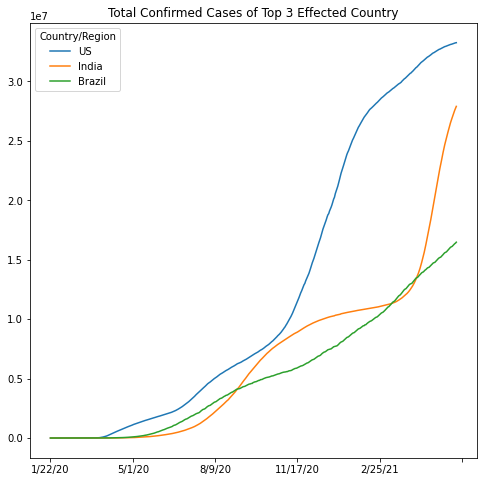

In [38]:
data_trans.plot(y=['US','India','Brazil'],use_index=True,figsize=(8,8),title='Total Confirmed Cases of Top 3 Effected Country')

## Country Level Drill-Down(Without using Plotly or Matplot Library)

In [34]:
global_detail.copy().drop(columns=['Incident_Rate','People_Tested','People_Hospitalized','UID','ISO3']).sort_values('Confirmed',ascending=False).reset_index(drop=True).style.bar(align='left',width=99,color='	#0000CD')

,Country_Region,Confirmed,Deaths,Recovered,Active,Mortality_Rate
0,US,33251982.000000,594306.000000,,,1.787280
1,India,27894800.000000,325972.000000,25454320.000000,2114508.000000,1.168576
2,Brazil,16471600.000000,461057.000000,14496224.000000,1514319.000000,2.799103
3,France,5719877.000000,109518.000000,390878.000000,5218628.000000,1.914692
4,Turkey,5235978.000000,47271.000000,5094279.000000,94428.000000,0.902811
5,Russia,5005171.000000,119130.000000,4623764.000000,262277.000000,2.380138
6,United Kingdom,4496823.000000,128037.000000,15486.000000,4353300.000000,2.847277
7,Italy,4213055.000000,126002.000000,3845087.000000,241966.000000,2.990751
8,Argentina,3732263.000000,77108.000000,3288467.000000,366688.000000,2.065985
9,Germany,3688319.000000,88414.000000,3479700.000000,120102.000000,2.397135
